In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/data.csv', low_memory = False)
df.head(5)

,province_id,province_name,city_id,city_name,district_id,district,npsn,school_name,stage,status,street_name,lat,long
0,250000,Papua,251800,Kab. Tolikara,251831,Kec. Gilungbandu,60303704,SMP SATAP KAGI,SMP,N,Gilubandu,-3.415995,138.339704
1,250000,Papua,251800,Kab. Tolikara,251822,Kec. Wunin,60302267,SD YPPGI WURINERI,SD,S,Wunin,-3.479000,138.680000
2,250000,Papua,251800,Kab. Tolikara,251803,Kec. Bokondini,60302279,SMAN BOKONDINI,SMA,N,MAIRINI,-3.531731,138.658234
3,250000,Papua,251800,Kab. Tolikara,251814,Kec. Kuari,60302215,SD INPRES KUARI,SD,N,Kuari,-3.518100,138.529500
4,250000,Papua,251800,Kab. Tolikara,251802,Kec. Karubaga,60302283,SMAS YPPGI KARUBAGA,SMA,S,AMPERA,-3.449100,138.598800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103251 entries, 0 to 103250
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   province_id    103251 non-null  int64  
 1   province_name  103251 non-null  object 
 2   city_id        103251 non-null  int64  
 3   city_name      103251 non-null  object 
 4   district_id    103251 non-null  int64  
 5   district       103251 non-null  object 
 6   npsn           103250 non-null  object 
 7   school_name    103250 non-null  object 
 8   stage          103250 non-null  object 
 9   status         103250 non-null  object 
 10  street_name    103248 non-null  object 
 11  lat            102758 non-null  float64
 12  long           102758 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 10.2+ MB


In [6]:
df.drop(['province_id', 'city_id', 'district_id', 'npsn'], axis = 1, inplace = True)
df.sample(5)

,province_name,city_name,district,school_name,stage,status,street_name,lat,long
100007,D.K.I. Jakarta,Kab. Kepulauan Seribu,Kec. Kepulauan Seribu Utara,SD NEGERI PULAU HARAPAN 01 PG,SD,N,Pulau Harapan Rt. 04/02,-5.653161,106.580277
30311,Jawa Tengah,Kab. Karanganyar,Kec. Matesih,SMP PGRI 4 MATESIH,SMP,S,"Moyoretno, Matesih",-7.649363,111.043331
83784,Kalimantan Barat,Kab. Kapuas Hulu,Kec. Bunut Hulu,SD NEGERI 02 NANGA SURUK,SD,N,Nanga Suruk,0.512500,112.668700
43469,D.I. Yogyakarta,Kota Yogyakarta,Kec. Umbulharjo,SD NEGERI GAMBIRAN,SD,N,Jl. Perintis Kemerdekaan UH V/229 Yogyakarta,-7.819300,110.393700
55210,Jawa Timur,Kab. Bondowoso,Kec. Botolinggo,SDN PENANG 4,SD,N,Ban-ban Penang,-7.908800,114.030600


In [7]:
url = 'https://en.wikipedia.org/wiki/Provinces_of_Indonesia'
population = pd.read_html(url)[3]
population.head()

,Arms,Province,Indonesianname,Indonesianacronym,ISO[5],Capital,Largest city,Population(mid-2022estimate)[6],Area (km2),Density(/km2)(2022)[7],Geographical unit,No. of cities &regencies,No. ofcities,No. ofregencies
0,NaN,Aceh,Aceh,Aceh,ID - AC,Banda Aceh,Banda Aceh,5407900,56835,95.0,Sumatra,23,5,18
1,NaN,Bali,Bali,Bali,ID - BA,Denpasar,Denpasar,4415100,5590,790.0,Lesser Sunda Islands,9,1,8
2,NaN,Bangka Belitung Islands,Kepulauan Bangka Belitung,Babel,ID - BB,Pangkal Pinang,Pangkal Pinang,1494600,16690,90.0,Sumatra,7,1,6
3,NaN,Banten,Banten,Banten,ID - BT,Serang,Tangerang,12252000,9353,1310.0,Java,8,4,4
4,NaN,Bengkulu,Bengkulu,Bengkulu,ID - BE,Bengkulu,Bengkulu,2060100,20128,102.0,Sumatra,10,1,9


In [15]:
#First, let's see these wrong inputs
df['long'].max()

6000.0

<Axes: xlabel='long'>

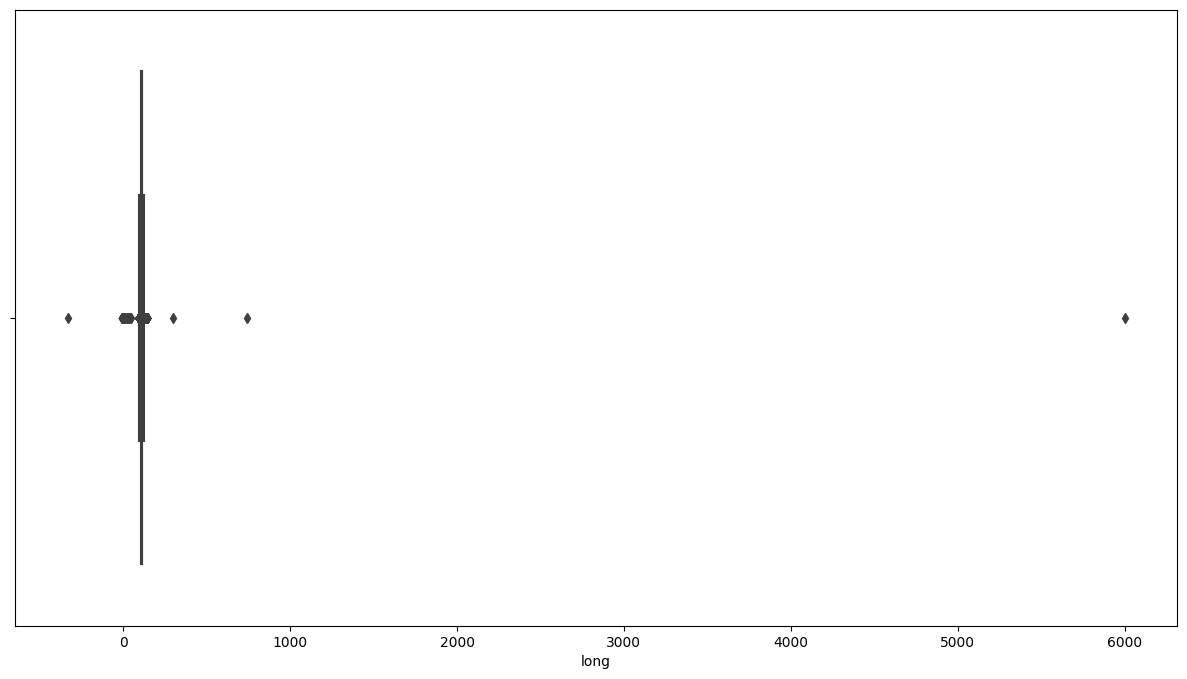

In [16]:
plt.figure(figsize= (15,8))
sns.boxplot(data = df, x= 'long')
# Wee can see how outliers are effecting to the graph

In [17]:
df[df['long']>142]
# there are misinputs (6000, 9720) on Longitude

,province_name,city_name,district,school_name,stage,status,street_name,lat,long
221,Papua,Kab. Yalimo,Kec. Abenaho,SMP NEGERI ABENAHO,SMP,N,Pass-valley,-3.7806,6000.000
9325,Papua Barat,Kab. Sorong Selatan,Kec. Fkour,SD INPRES 23 PASIR PUTIH,SD,N,Kampung Pasir Putih,-1.1625,300.000
14526,Jawa Barat,Kab. Tasikmalaya,Kec. Karangnunggal,SD NEGERI CILANGKAP,SD,N,Cilangkap,-7.6501,744.343


<Axes: xlabel='lat'>

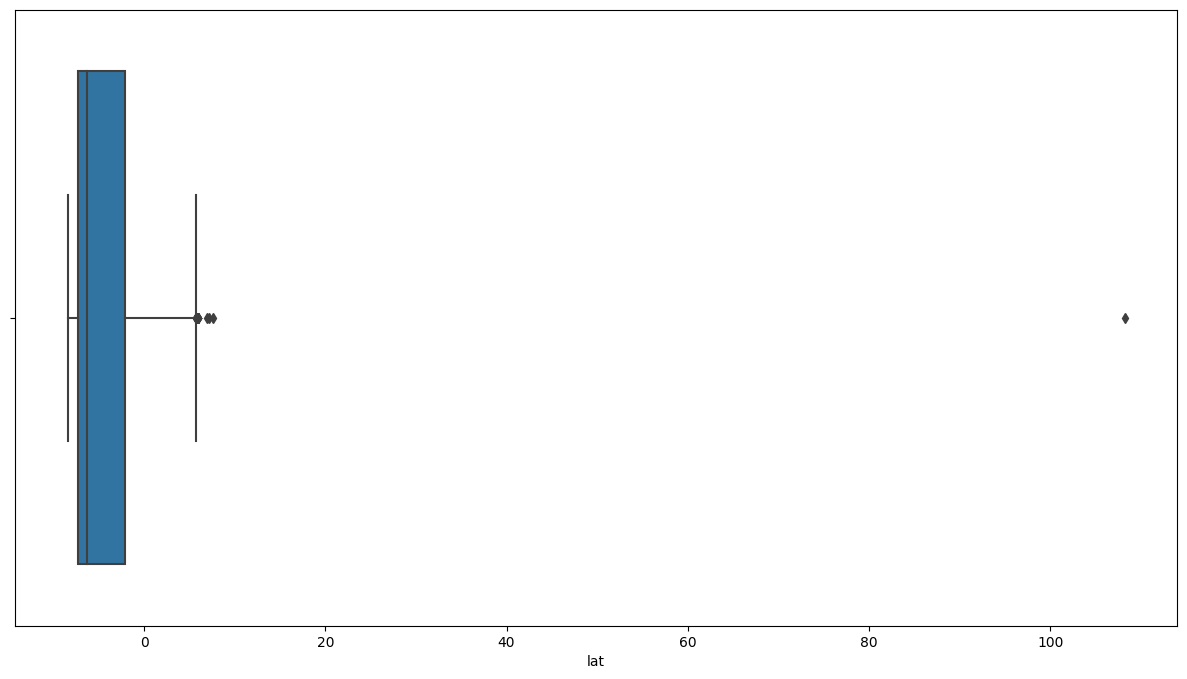

In [18]:
plt.figure(figsize= (15,8))
sns.boxplot(data = df, x= 'lat')
# Latitude also the same

In [19]:
# Here I am dropping outliers
# But the I decreased minimum and increased maximum so that I can keep if it is closer the range
map_df = df[((df['long']>90)&(df['long']<150))&(df['lat']>-10)&(df['lat']<13)]
map_df.sample(5)

,province_name,city_name,district,school_name,stage,status,street_name,lat,long
63621,Aceh,Kota Sabang,Kec. Sukakarya,SD NEGERI 17 SABANG,SD,N,Jln. Krueng Raya,5.865440,95.3174
40336,Jawa Tengah,Kota Semarang,Kec. Gunung Pati,SMP NEGERI 24 SEMARANG,SMP,N,Jln Pramuka 1,-7.054100,110.4043
64568,Sumatera Utara,Kab. Langkat,Kec. Babalan,SDISLAM AL MAARIF,SD,S,Jl. Kalimantan no.3,3.958700,98.2876
94770,Sulawesi Tengah,Kab. Sigi,Kec. Sigibiromaru,SD NEGERI 1 KALUKUBULA,SD,N,Jl. Guru Tua Kalukubula,-0.946691,119.8834
94020,Sulawesi Tengah,Kab. Tolitoli,Kec. Dampal Selatan,SMKS AL ITTIHAD DDI SONI,SMK,S,JL. HI. ASAF NO. 01,0.732500,120.1946


In [21]:
# listing categorial columns of df
cat_cols = list(df.select_dtypes(['object']))
# assigning 'other' if low frequent
for col in cat_cols:
    frequent_values = list(df[col].value_counts().nlargest(30).index)
    df[col] = df[col].apply(lambda value: value if value in frequent_values else 'other')

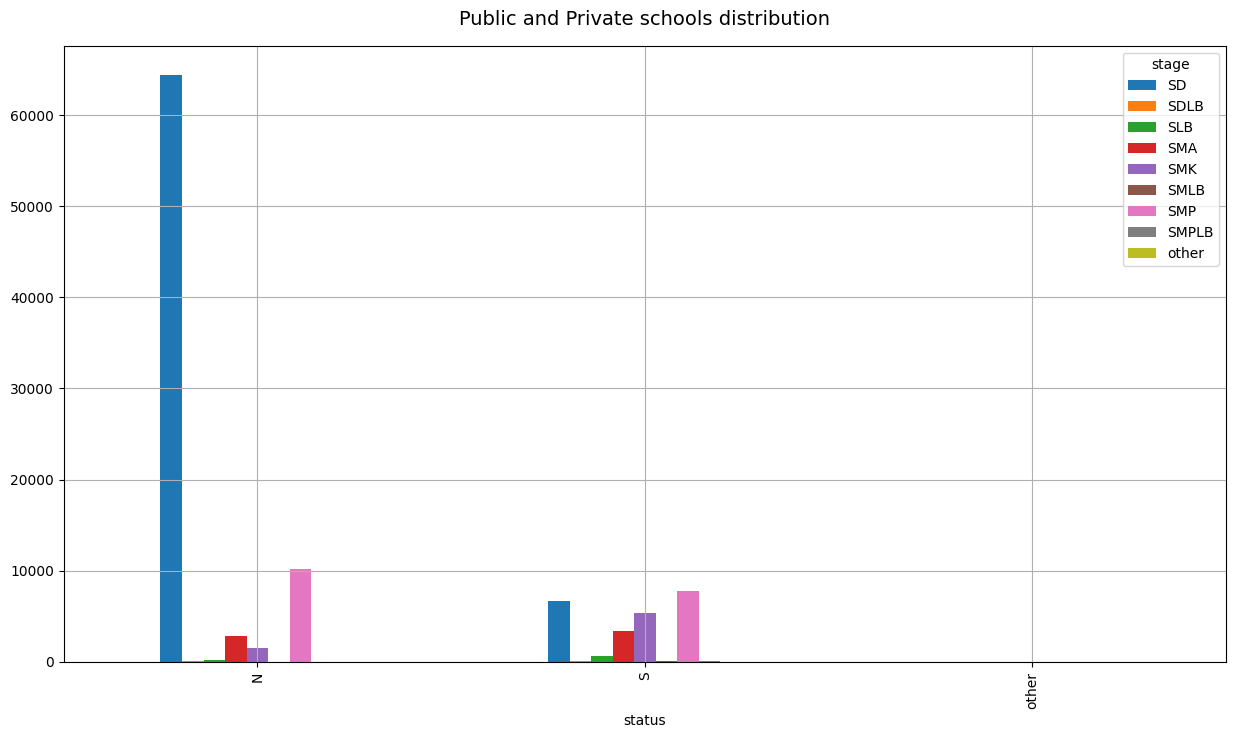

In [23]:
pd.pivot_table(df, index = 'status', columns = 'stage',
               values ='province_name', aggfunc = 'count').plot(kind = 'bar', figsize= (15,8))
plt.title('Public and Private schools distribution', fontsize = 14, pad = 15);
plt.grid()

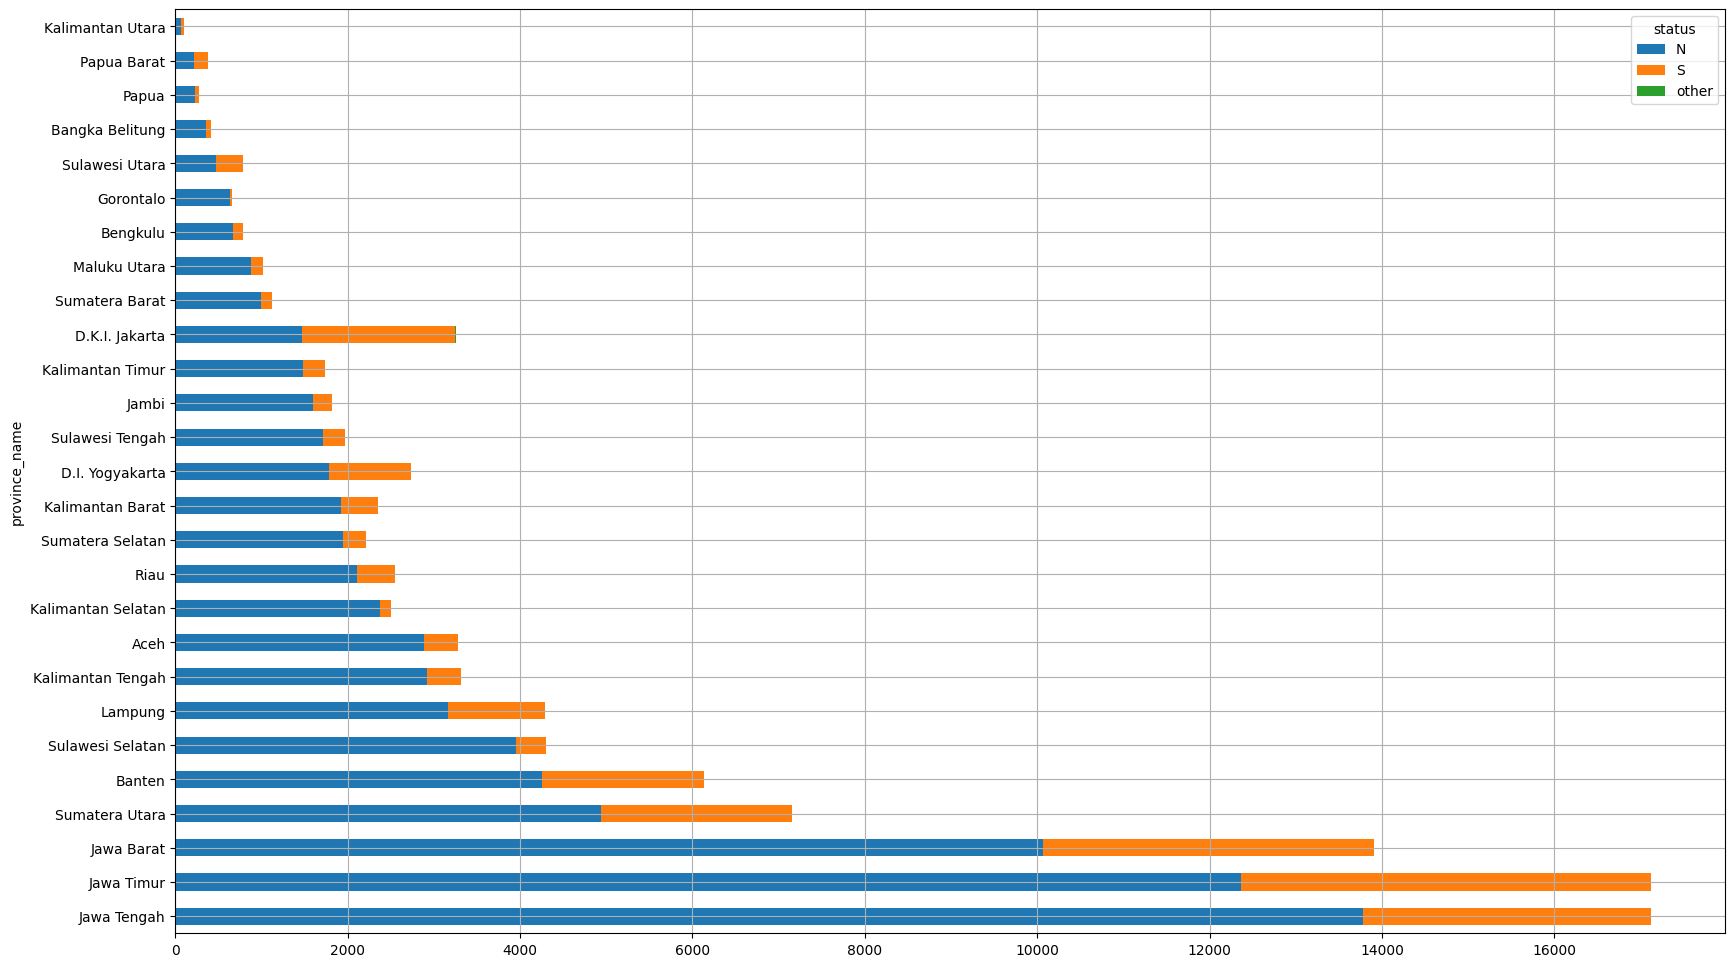

In [25]:
status_df = pd.pivot_table(df, index = 'province_name', columns = 'status', values = 'district',
                        aggfunc = 'count').sort_values('N',ascending = False)
status_df.plot(kind = 'barh', stacked = True, figsize = (20,12))
plt.grid()

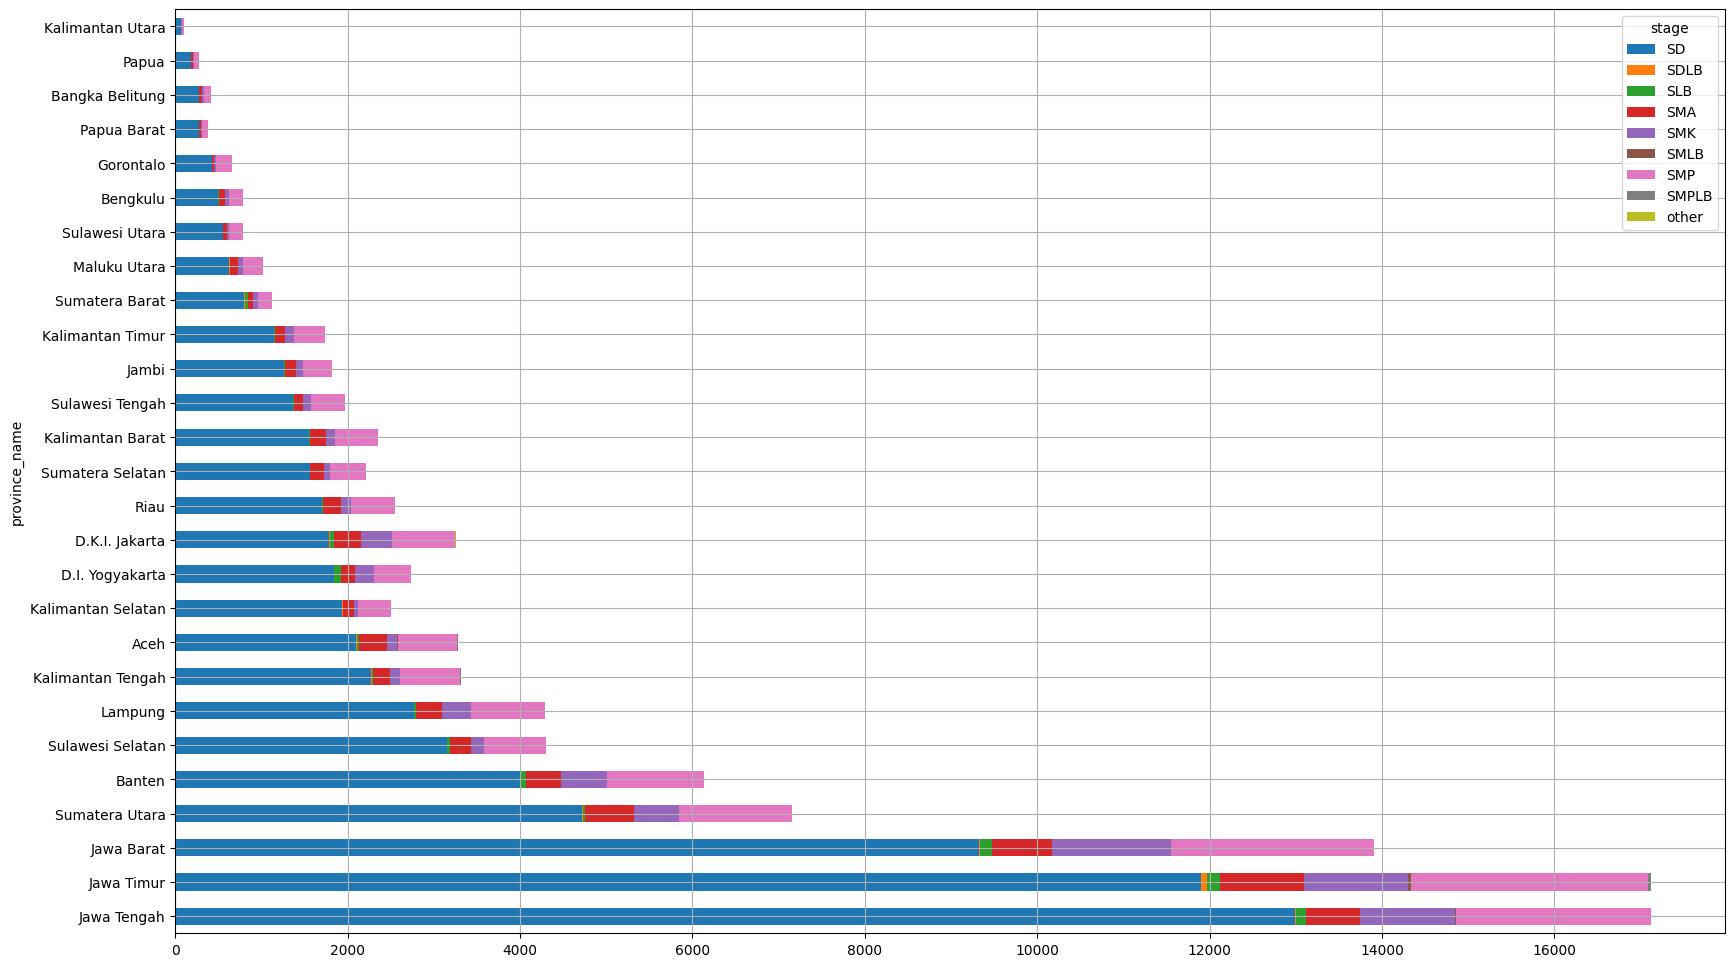

In [26]:
stage_df = pd.pivot_table(df, index = 'province_name', columns = 'stage', values = 'district',
                        aggfunc = 'count').sort_values('SD',ascending = False)
stage_df.plot(kind = 'barh', stacked = True, figsize = (20,12))
plt.grid()